**Milos Atz**  

**1. Describe the sweeping process in one dimension (marching through space) along one angle using the diamond difference scheme**

**(a) for $\boldsymbol{\mu \gt 0}$**

We can explain the sweeping process by considering some arbitrary cell $i$ in a mesh that covers the solution space. Here, $x_{i+1/2} - x_{i-1/2} = h \equiv \Delta_i$. If we integrate over space in our one dimension and divide by the differential volume of a cell, we get the following cell-balance equation.

$$
\frac{\mu}{\Delta_i}(\psi_{i+1/2}-\psi_{i-1/2})+
\Sigma_{i}\psi_{i} = s_{i}
$$

Here, $\Sigma_{i}$ is the cell-averaged total cross section.

When $\mu \gt 0$, $\psi_{i-1/2}$ is the *incoming* flux and $\psi_{i+1/2}$ is the *outgoing* flux. We need a way to relate the center-cell and edge fluxes to each other and can use the above to define it.

$$
\psi_i=\frac{1}{2}\left(\psi_{i+1/2}+\psi_{i-1/2}\right)
$$

$$
\psi_{i+1/2} = 2\psi_{i}-\psi_{i-1/2}
$$

Note that the center flux, $\psi_i$, is the average of the incoming and outgoing fluxes; in weighted diamond difference, a weighting factor is imposed.

Substituting the above into the cell-balance equation yields a system of equations:

$$
\psi_i = \frac{s_i + 2\frac{|\mu|}{\Delta_i}\psi_{i-1/2}}{\Sigma_i+2\frac{|\mu|}{\Delta_i}\psi_{i-1/2}}
$$

$$
\psi_{i+1/2} = 2\psi_i-\psi_{i-1/2}
$$



Let us assume that we know the flux coming into cell $i$. We can march through the spatial mesh and solve first for the cell-center flux $\psi_i$ using the incoming flux, $\psi_{i-1/2}$. Then, we can solve for the outgoing flux, $\psi_{i+1/2}$; the outgoing flux in one cell is considered as the incoming flux in the next cell. This entire process can be repeated for the flux in each angle.

**(b) for $\boldsymbol{\mu \lt 0}$**

For $\mu \lt 0$, the process is the same, but the conditions are reversed. This time, $\psi_{i+1/2}$ is the incoming flux. The system of equations becomes the following:

$$
\psi_i = \frac{s_i + 2\frac{|\mu|}{\Delta_i}\psi_{i+1/2}}{\Sigma_i+2\frac{|\mu|}{\Delta_i}\psi_{i+1/2}}
$$

$$
\psi_{i-1/2} = 2\psi_i-\psi_{i+1/2}
$$

Again, we know the flux coming into cell $i$ as $\psi_{i+1/2}$; we use this to solve for cell-center flux $\psi_i$ and outgoing flux $\psi_{i-1/2}$. We take the outgoing flux from the previous cell as the incoming flux in the next. This entire process is performed for each angle.

**(c) at a reflecting boundary on the right edge, including how to transition from $\boldsymbol{\mu \gt 0}$ to $\boldsymbol{\mu \lt 0}$**

In this case, we are approaching the right-edge boundary and assume reflecting boundary conditions. Let cell $I$ be the last cell; we've already solved for the outgoing flux from cell $I-1$. This is the incoming flux into cell $I$. We can use this to solve for the cell-center flux in cell I.

To consider the reflective boundary, we have to relate the both the direction of the flux and its angle. Let us assume that we've discretized angle such that we have $1,...,N$ angles and that we are solving for angle $n$. The outgoing flux from cell $I$ in direction $n$ is given as

$$
\psi_{i+1/2, \space n} = 2\psi_{i, \space n} -\psi_{i-1/2, \space n}
$$

In this case, we use the following condition as the initial condition for the sweep to the left.
$$
\psi_{I+1/2, \space N+1-n} = \psi_{I+1/2, \space n}
$$

Now, we can sweep to the left in the angle $N+1-n$ in direction $\mu \lt 0$.

** (d) If using the angular flux to generate flux moments during the solution process, what data do you need to store in the sweeping process?**

Only the flux moments $\phi_{li}$ need to be saved in the computer memory from one iteration to the next, since the contribution of $\psi_{il}^m$ to $q_{in}^m$ is made point by point as the sweeping progresses.

(From L+M pg. 130).

**2. Let’s look at truncation error in the diamond difference method by examining the 1-D case. Consider uncollided neutrons with a zero group source moving along angle $\boldsymbol{a}$:**

$$
\boldsymbol{\mu_a\frac{d\psi_a}{dx}+\Sigma_t\psi_a(x)=0,}
$$

**where the cross section is taken as constant.**

**(a) For neutrons moving $\boldsymbol{\mu_a \gt 0}$, write an expression for the flux at some location $\boldsymbol{x′}$ in terms of the flux at location $\boldsymbol{x}$ (you should have an exponential).**

We can evaluate the above as a first order ordinary differential equation.

$$
\mu_a\frac{d\psi_a}{dx}=-\Sigma_t\psi_a(x)
$$

$$
\frac{1}{\psi_a(x)}d\psi_a=-\frac{\Sigma_t}{\mu_a}dx
$$

Let the current location be given as $\boldsymbol{X}$; the arbitrary different location is given as $\boldsymbol{X'}$.

$$
\int_{\boldsymbol{X}}^{\boldsymbol{X'}}{\frac{1}{\psi_a(x)}d\psi_a}=
-\int_{\boldsymbol{X}}^{\boldsymbol{X'}}{\frac{\Sigma_t}{\mu_a}dx}
$$

$$
\ln(\psi_a(x)) \big\rvert_{\boldsymbol{X}}^{\boldsymbol{X'}} = 
\frac{\Sigma_t}{\mu_a}x\big\rvert_{\boldsymbol{X}}^{\boldsymbol{X'}}
$$

$$
\ln(\psi_a(X')) - \ln(\psi_a(X)) = \frac{\Sigma_t}{\mu_a}(X'-X)
$$

$$
\ln(\psi_a(X')) = \frac{\Sigma_t}{\mu_a}(X'-X)+\ln(\psi_a(X)) 
$$

$$
\psi_a(X') = e^{\frac{\Sigma_t}{\mu_a}(X'-X)+\ln(\psi_a(X))}
$$

$$
\psi_a(X') = e^{\frac{\Sigma_t}{\mu_a}(X'-X)}e^{\ln(\psi_a(X))}
$$

$$
\psi_a(X') = \psi_a(X)e^{\frac{\Sigma_t}{\mu_a}(X'-X)}, \quad \boldsymbol{X'} \gt \boldsymbol{X}
$$

**(b) Let's say we impose a Cartesian grid with mesh index $\boldsymbol{i}$. What is the expression for $\boldsymbol{\psi_{a, \space i+1/2}}$ in terms of $\boldsymbol{\psi_{a, \space i-1/2}}$? Use mesh spacing $\boldsymbol{\Delta_i = x_{i+1/2}-x_{i-1/2}}$ and the definition $\boldsymbol{h \equiv \frac{\Sigma_t \Delta_i}{2|\mu_a|}}$.**

(L+M pg 131)

Let's assume that we're moving to the right; then, because $X' \gt X$, $\psi_{a, \space i+1/2} \equiv \psi_a(X')$ and $\psi_{a, \space i-1/2} \equiv \psi_a(X)$. If we plug these into the above, we arrive at the following, where $X' \equiv i+1/2$ and $X \equiv i-1/2$.

$$
\psi_{a, \space i+1/2} = \psi_{a, \space i-1/2}e^{\frac{\Sigma_t}{\mu_a}\left((i+1/2)-(i-1/2)\right)}
$$

Here, $\left(i+1/2)-(i-1/2)\right)$ is the mesh spacing, $\Delta_i$.
 
$$
\psi_{a, \space i+1/2} = \psi_{a, \space i-1/2}e^{\frac{\Sigma_t}{\mu_a}\Delta_i}
$$

We can directly substitute $h$ into the above to find that:

$$
\psi_{a, \space i+1/2} = \psi_{a, \space i-1/2}e^{-2h}
$$

**(c) Plug the relationship you just found into the 1-D diamond difference equations $\boldsymbol{(\alpha = 0)}$. Manipulate those to get another expression for $\boldsymbol{\psi_{a, \space i+1/2}}$ in terms of $\boldsymbol{\psi_{a, \space i-1/2}}$ and $\boldsymbol{h}$.**

I'm not sure why we're asked to plug the relationship from (b) into the 1-D DD equations; if we do that, it'll be impossible to get another expression for $\psi_{a, \space i+1/2}$ in terms of $\psi_{a, \space i-1/2}$ and $h$ because we'll have eliminated one or the other by substitution. Doing so yields:

$$
\frac{\mu_a}{\Delta_i}(e^{-2h}-1)\psi_{a, i-1/2}+
\Sigma_{i}\psi_{a, i} = 0
$$

$$
\psi_{a,i} =\frac{1}{2}\left(1+e^{-2h}\right)\psi_{a,\space i-1/2}
$$

The diamond difference equations ($\alpha = 0$) are (with 0 source):

$$
\frac{\mu_a}{\Delta_i}(\psi_{a, i+1/2}-\psi_{a, i-1/2})+
\Sigma_{i}\psi_{a, i} = 0
$$

$$
\psi_{a,i} =\frac{1}{2}\left(\psi_{a, i+1/2}+\psi_{a, i-1/2}\right)
$$

These can be rearranged to eliminate $\psi_{a,i}$

$$
\frac{\mu_a}{\Delta_i}(\psi_{a, i+1/2}-\psi_{a, i-1/2})+
\frac{1}{2}\Sigma_{i}\left(\psi_{a, i+1/2}+\psi_{a, i-1/2}\right) = 0
$$

Further rearranging,

$$
\frac{\mu_a}{\Delta_i}\psi_{a, i+1/2}-\frac{\mu_a}{\Delta_i}\psi_{a, i-1/2}+
\frac{1}{2}\Sigma_{i}\psi_{a, i+1/2}+\frac{1}{2}\Sigma_{i}\psi_{a, i-1/2} = 0
$$

$$
\frac{\mu_a}{\Delta_i}\psi_{a, i+1/2}+\frac{1}{2}\Sigma_{i}\psi_{a, i+1/2} = 
\frac{\mu_a}{\Delta_i}\psi_{a, i-1/2} - \frac{1}{2}\Sigma_{i}\psi_{a, i-1/2}
$$

$$
\left(\frac{\mu_a}{\Delta_i}+\frac{\Sigma_{i}}{2}\right)\psi_{a, i+1/2} = 
\left(\frac{\mu_a}{\Delta_i}-\frac{\Sigma_{i}}{2}\right)\psi_{a, i-1/2}
$$

Multiplying both sides by $\frac{\Delta_i}{\mu_a}$:

$$
\left(1+\frac{\Sigma_{i}\Delta_i}{2\mu_a}\right)\psi_{a, i+1/2} = 
\left(1-\frac{\Sigma_{i}\Delta_i}{2\mu_a}\right)\psi_{a, i-1/2}
$$

We can say that in this case, $\mu_a = |\mu_a|$ because we've defined that $X' \gt X$, so $\mu_a$ is positive. Therefore, we can substitute in the definition for $h$:

$$
\left(1+h\right)\psi_{a, i+1/2} = 
\left(1-h\right)\psi_{a, i-1/2}
$$

$$
\psi_{a, i+1/2} = \frac{\left(1-h\right)}{\left(1+h\right)}\psi_{a, i-1/2}
$$

**(d) Look again at your solution from part b. Expand the exponential in a power series through the $\boldsymbol{h^2}$ term and show that it is the same as your solution from part c. What does that mean about the accuracy of the relationship?**

An exponential function can be defined by the power series

$$
e^x = \sum_{n=0}^{\infty}\frac{x^n}{n!} 
= 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \dots
$$

In this way, we can expand the result from part b ($\psi_{a, \space i+1/2} = \psi_{a, \space i-1/2}e^{-2h}$) about the exponential through the $h^2$ term.

$$
\psi_{a, \space i+1/2} = \psi_{a, \space i-1/2}
\left[1+(-2h)+\frac{(-2h)^2}{2!}\right]
$$

$$
\psi_{a,\space i+1/2}=\psi_{a,\space i-1/2}\left[1-2h+2h^2\right]
$$

To see the comparison with the result from part c, we can expand the expression in that result in a Taylor series.

$$
\frac{h-1}{h+1} = 1 - 2h + 2h^2 + \cdots
$$

The two are exact up through the $O(h^2)$ term. This indicates that the relationship is a second-order accurate $O(h^2)$ method.

**(e) Look carefully at the expression for $\boldsymbol{\psi_{a, \space i+1/2}}$. What is a condition on $\boldsymbol{h}$ that would guarantee that the flux would be positive? What does that mean about mesh spacing given the smallest $\boldsymbol{\mu_a}$ in a set and a specific $\boldsymbol{\Sigma_t}$?**

For $h > 1$, it is clear that negative fluxes will result. Using $h << 1$ is desirable but might not be feasible if the cross sections are large or high-order $S_N$ calculations are necessary such that small values of $|\mu_a|$ are included in the quadrature; in both cases, a very small mesh is required. To guarantee that there will be no negative fluxes, the mesh size must decrease as the $S_N$ order increases. The mesh size on mean free paths must meet the criterion

$$
\frac{\Delta}{\lambda} < 2|\mu_1|
$$

where $|\mu_1|$ is taken as the minimum value of $\mu$ in the quadrature set.

**3. Write a piece of code that implements the 1-D, one-speed, steady state, weighted diamond difference equations; include scattering and an external source. Use $\boldsymbol{\psi(0) = 2.0}$ for $\boldsymbol{\mu \gt 0}$; non-reentrant boundary condition at $\boldsymbol{x = 0.0}$ and a reflecting boundary at $\boldsymbol{x = 2.0}$. For this case assume isotropic scattering.**

For this problem, we want to set up the equation $\boldsymbol{L}\psi = q$, where $\boldsymbol{L}$ is a lower triangular matrix that operates on the spatially-ordered vector of $\psi$ flux values in one angle. The emission vector $q$ includes the outgoing flux from the previous cell and the source neutrons in the current cell and is similarly ordered.

To solve this system of equations, we march through space and solve as we go. When we get to the boundary, because this is a 1-D slab with one reflecting boundary, we simply set $\mu_2 = -\mu_1$ and let the incoming flux from that boundary in direction $\mu_2$ be the outgoing flux in direction $\mu_1$.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [25]:
# Function that solves for the flux over the spatial mesh, given inputs
def wdd(xmin, xmax, h, alpha, sigma_t, sigma_s, ext_source, muVector, qs_tol = 1e-5):
    ######################################################################################
    # SUPPORTING FUNCTIONS FOR THE MAIN WDD FUNCTION
    #------------------------------------------------------------------------------------#
    def center_flux(incomingFlux, source, xs, alpha, h, mu):
        # returns the cell-centered flux from a single mesh cell
        if(mu > 0):
            cellCenteredFlux = (source+(2*abs(mu)*(incomingFlux)/(1+alpha)/h))\
            /(xs+(2*abs(mu)/(1+alpha)/h))
        if(mu < 0):
            cellCenteredFlux = (source+(2*abs(mu)*(incomingFlux)/(1-alpha)/h))\
            /(xs+(2*abs(mu)/(1-alpha)/h))
        return(cellCenteredFlux)
    #------------------------------------------------------------------------------------#
    def outgoing_flux(incomingFlux, cellCenteredFlux, source, xs, alpha, h, mu):
        # returns the outgoing flux from a single mesh cell
        if(mu > 0):
            outgoingFlux = 2*cellCenteredFlux/(1+alpha)-(1-alpha)*incomingFlux/(1+alpha)
        if(mu < 0):
            outgoingFlux = 2*cellCenteredFlux/(1-alpha)-(1+alpha)*incomingFlux/(1-alpha)   
        return(outgoingFlux) 
    #------------------------------------------------------------------------------------#
    def mesh(xmin, xmax, h):
        # determine cell-center x values
        nCells = int((xmax-xmin)/h)
        cellCenters = np.zeros(nCells)
        for i in range(0, nCells):
            cellCenters[i] = round((i+1)*h-(h/2.0), 4)
        return(cellCenters)
    #------------------------------------------------------------------------------------#
    def quad_int(fluxes, wts):
        # returns sum_a=1^N(psi_a*w_a)
        for i in range(0, len(fluxes)):
            fluxes[i]=wts[i]*fluxes[i]
        return(np.sum(fluxes, axis=0))
    #------------------------------------------------------------------------------------#
    def scattering_sources(xs_s, fluxes, wts):
        # returns the scattering source in each mesh cell
        # qs = (Sigma_s/4pi)*2pi+sum_a=1^N(psi_a*w_a)
        fluxes = quad_int(fluxes, wts)
        return((xs_s/2.0)*fluxes)
    #------------------------------------------------------------------------------------#
    # returns a single iteration for flux in both directions given mu
    # note that source is an array
    def wdd_iter(cells, h, sigma_t, source, mu, nIncomingAngles):
        # sweep to the left
        mu = abs(mu)
        lFlux = np.zeros(len(cells))
        hFlux = 2.0/nIncomingAngles # incoming flux at the left bound
        for i in range(0, len(lFlux)):
            lFlux[i] = center_flux(hFlux, source[i], sigma_t, alpha, h, mu)
            hFlux = outgoing_flux(hFlux, lFlux[i], source[i], sigma_t, alpha, h, mu)
        #-----------------------------------------------------------------------#
        # sweep to the right
        mu = -abs(mu)
        rFlux = np.zeros(len(cells))
        # incoming flux at the RHS is the outgoing flux from opp. dir.
        for i in range(0, len(rFlux))[::-1]:
            rFlux[i] = center_flux(hFlux, source[i], sigma_t, alpha, h, mu)
            hFlux = outgoing_flux(hFlux, rFlux[i], source[i], sigma_t, alpha, h, mu)
        return(lFlux, rFlux)
    ######################################################################################
    # MAIN WDD FUNCTION
    #------------------------------------------------------------------------------------#
    # Initiate vector of x values for the center of cells
    cells = mesh(xmin, xmax, h)
    flux = {}
    for mu in muVector:
        flux[mu]=np.zeros(len(cells))
        flux[-mu]=np.zeros(len(cells))
    # determine the weights; these sum to 2.0 and are equal for all angles
    # weights = np.ones(2*len(muVector))/len(muVector)
    weights = np.ones(2*len(muVector))/len(muVector)
    #------------------------------------------------------------------------------------#
    error = 1.0 # arbitrary
    counter = 0 # iteration counter
    while(error > qs_tol):
        counter = counter+1
        s_source_old = scattering_sources(sigma_s, flux.values(), weights)
        source = ext_source+s_source_old
        for mu in muVector:
            flux[mu], flux[-mu]=wdd_iter(cells, h, sigma_t, source, mu, len(muVector))
        s_source_new = scattering_sources(sigma_s, flux.values(), weights)
        error = np.linalg.norm(s_source_new - s_source_old)
    #------------------------------------------------------------------------------------#
    flux = quad_int(flux.values(), weights)
    print('convergence reached in '+str(counter)+' iteration(s).')
    return(cells, flux)

**(a) Explore negative flux: use the following values:**
* $\boldsymbol{\alpha = 0}$
* $\boldsymbol{\mu_a = \pm 0.1}$
* $\boldsymbol{\Sigma_t = 1.0}$
* $\boldsymbol{\Sigma_s = 0}$
* $\boldsymbol{q_e(x) = 0}$
* **mesh spacings: $\boldsymbol{h = [0.08, 0.1, 0.125, 0.2, 0.4]}$.**

**Plot the cell-centered scalar flux that results from each mesh spacing. What do you notice? How does that compare with your conclusion from the previous problem?**

convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).


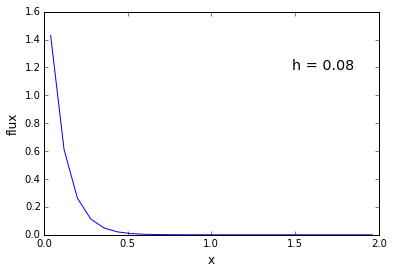

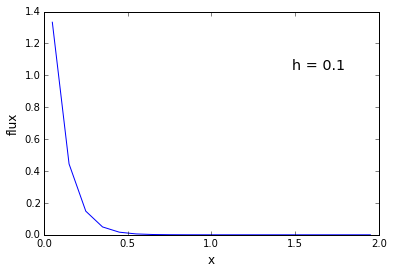

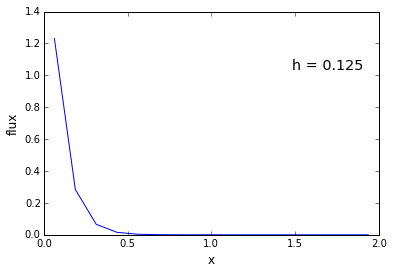

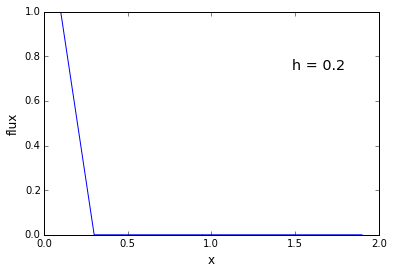

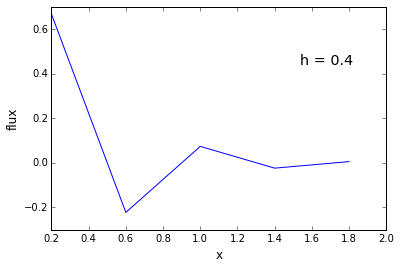

In [26]:
# INPUT DATA
xmin = 0.0
xmax = 2.0
h = [0.08, 0.1, 0.125, 0.2, 0.4]
alpha = 0.0
sigma_t = 1.0
sigma_s = 0.0
externalSource = 0.0
mu = [0.1] # assume plus or minus
for sp in h:
    xPoints, fluxVals = wdd(xmin, xmax, sp, alpha, sigma_t, sigma_s, externalSource, mu)
    plt.figure()
    plt.plot(xPoints, fluxVals)
    plt.xlabel('x', size = 'large')
    plt.ylabel('flux', size = 'large')
    plt.figtext(0.7, 0.7, 'h = '+str(sp), size = 'x-large')

It is apparent that as the mesh spacing gets larger, the solution for flux becomes more and more coarse until a negative flux results when $h = 0.4$. In the previous question, the condition that guaranteed no negative fluxes was that $\frac{\Delta}{\lambda} < 2|\mu_1|$. In this case, $\lambda = \frac{1}{1} = 1$, so $\Delta$ must be smaller than 0.2 to guarantee positive flux. Indeed, we see that when $h = 0.2$, the flux is zero for most of the space.
 


**(b) Impact of $\boldsymbol{\alpha}$: try $\boldsymbol{\alpha = [-0.9, -0.5, 0.25, 0.5, 0.9]}$. What happens?**

We're going to assume for part (b) that the mesh spacing is constant - we'll look at two mesh spacings in particular: $h = [0.125, 0.4]$. What I want to see is how $\alpha$ affects the answer when the mesh spacing is too big and when it's an okay value.

convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).
convergence reached in 1 iteration(s).


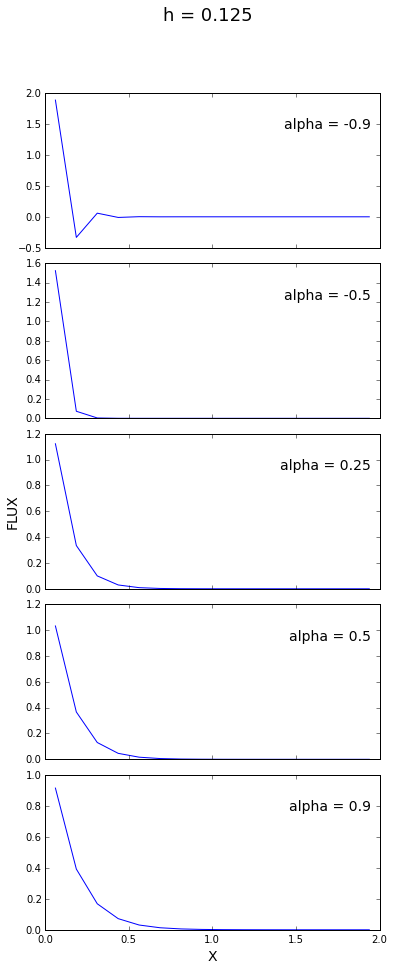

In [27]:
# INPUT DATA
xmin = 0.0
xmax = 2.0
#h = 0.125
h = 0.125
alpha = [-0.9, -0.5, 0.25, 0.5, 0.9]
sigma_t = 1.0
sigma_s = 0.0
externalSource = 0.0
mu = [0.1] # assume plus or minus
#------------------------------------------------------------------------------------#
fig, axs = plt.subplots(5,1, figsize=(6, 15), sharex = True, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
#------------------------------------------------------------------------------------#
for j in range(0,len(alpha)):
    xPoints, fluxVals= wdd(xmin, xmax, h, alpha[j], sigma_t, sigma_s, externalSource, mu)
    axs[j].plot(xPoints, fluxVals)
    axs[j].annotate('alpha = '+str(alpha[j]), xy=(0.97, 0.75), xycoords='axes fraction', 
             fontsize=14, horizontalalignment='right', verticalalignment='bottom')
#------------------------------------------------------------------------------------#
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xlabel("X", fontsize = 14)
plt.ylabel("FLUX", fontsize = 14)
fig.suptitle('h = '+str(h), fontsize = 18)

Small $\alpha$ is bad. Big $\alpha$ is good! It can even compensate for the large mesh spacing in terms of flux shape. There is variability in magnitude as well. As $\alpha$ increases, we see (what I might ignorantly describe as) a convergence in the bounds of the y-axis.

**(c) Real results? Now try adding a source:**
* $\boldsymbol{\alpha = [-0.5, 0, 0.5}$**; feel free to try others**
* $\boldsymbol{\mu_a = \pm [0.2, 0.7]}$
* $\boldsymbol{\Sigma_t = 1.0}$
* $\boldsymbol{\Sigma_s = 0.5}$
* $\boldsymbol{q_e(x) = 1.0}$

**Report the results**.

convergence reached in 17 iteration(s).
convergence reached in 17 iteration(s).
convergence reached in 17 iteration(s).


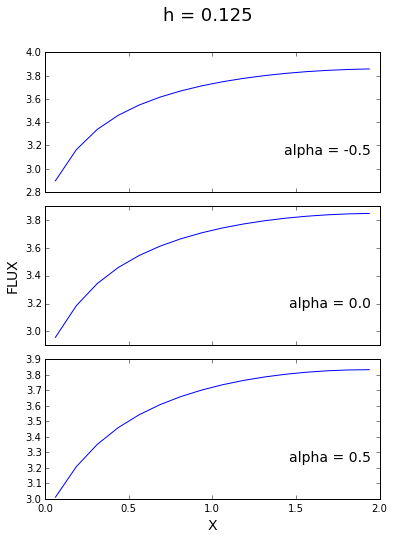

In [36]:
# INPUT DATA
xmin = 0.0
xmax = 2.0
h = 0.125
alpha = [-0.5, 0.0, 0.5]
sigma_t = 1.0
sigma_s = 0.5
externalSource = 1.0
mu = [0.2, 0.7] # plus and minus is assumed
#------------------------------------------------------------------------------------#
fig, axs = plt.subplots(len(alpha),1, figsize=(6, 8), sharex = True, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
#------------------------------------------------------------------------------------#
for j in range(0,len(alpha)):
    xPoints, fluxVals= wdd(xmin, xmax, h, alpha[j], sigma_t, sigma_s, externalSource, mu)
    axs[j].plot(xPoints, fluxVals)
    axs[j].annotate('alpha = '+str(alpha[j]), xy=(0.97, 0.25), xycoords='axes fraction', 
             fontsize=14, horizontalalignment='right', verticalalignment='bottom')
#------------------------------------------------------------------------------------#
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xlabel("X", fontsize = 14)
plt.ylabel("FLUX", fontsize = 14)
fig.suptitle('h = '+str(h), fontsize = 18)

The external source causes a slight difference in flux shape. Now, a large number of neutrons are coming from inside the bounds, whereas before all incoming neutrons were those entering from the left boundary. Note that I assume that the total incoming flux from the left is equal to 2.0; in this case, flux at each incoming angle contributes 1.0. Even though those neutrons are still entering, the left boundary has a vacuum boundary condition for neutrons travelling to the left, so the flux is lower there than it is at the reflecting boundary at the right.

For all values of $h$, there is not a lot of variation in flux shape as $\alpha$ changes, even when the mesh spacing is large. When $h = 0.4$ convergence is reached in the same number of iterations regardless of the value of $\alpha$.

**(d) What happens with $\boldsymbol{\alpha=0}$ and $\boldsymbol{\Sigma_s = 0.9}$?**

convergence reached in 66 iteration(s).


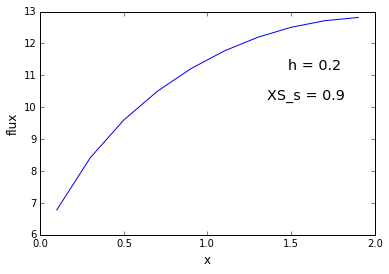

In [35]:
# INPUT DATA
xmin = 0.0
xmax = 2.0
h = 0.2
alpha = 0.0
sigma_t = 1.0
sigma_s = 0.9
externalSource = 1.0
mu = [0.2, 0.7] # plus and minus is assumed
xPoints, fluxVals= wdd(xmin, xmax, h, alpha, sigma_t, sigma_s, externalSource, mu)
plt.figure()
plt.plot(xPoints, fluxVals)
plt.xlabel('x', size = 'large')
plt.ylabel('flux', size = 'large')
plt.figtext(0.7, 0.7, 'h = '+str(h), size = 'x-large')
plt.figtext(0.65, 0.6, 'XS_s = '+str(sigma_s), size = 'x-large')

With $\alpha = 0$ and $\Sigma_s = 0.9$, the number of iterations increases significantly. In addition, the magnitude of the flux is much higher and increases as $\Sigma_s$ increases because less neutrons are getting absorbed in the material. 

**4. Starting from the following general system of equations:**

$$
\boldsymbol{
\frac{\mu_a}{h_i}(\psi_{a,i+1/2}^g-\psi_{a,i-1/2}^g)+
\Sigma_{t,i}^g\psi_{a,i}^g = 
\\=2\pi\sum_{a=1}^N w_a \sum_{g'=1}^G\Sigma_{s,i}^{gg'}(a' \rightarrow a)\psi_{a',i}^{g'}+\frac{\chi_g}{2}\sum_{g'=1}^G \nu_{g'}\Sigma_{f,i}^{g'}\phi_i^{g'}+
\frac{1}{2}Q_i^g
}$$

**...where $\boldsymbol{\phi}$ is the scalar flux, write a set of five coupled equations for a five-group problem. Assume neutrons can only downscatter from fast groups (1 and 2) to thermal groups (3, 4, and 5). Assume that thermal groups can upscatter into other thermal groups and can downscatter. Assume there is an external source and a fission source.**

To solve this problem, we need 5 equations coupled in energy subject to the assumptions provided in the problem statement. We'll assume that $i$ (the spatial index) and $a$ (the angle index) are fixed.

Group 1: Neutrons can't scatter into group 1, and downscattering is accounted for in the total interactions term. Neutrons can scatter from other angles $a'$ into angle $a$ while remaining in group 1. Fission neutrons born from fissions caused by neutrons in all energy groups can contribute neutrons into energy group 1, so the $g$ energy index remains in that term.

$\frac{\mu_a}{h_i}(\psi_{a,i+1/2}^1-\psi_{a,i-1/2}^1)
+\Sigma_{t,i}^1\psi_{a,i}^1
=2\pi\sum_{a=1}^N w_a \Sigma_{s,i}^{11}(a' \rightarrow a)\psi_{a',i}^{1}
+\frac{\chi_1}{2}\sum_{g'=1}^5 \nu_{g'}\Sigma_{f,i}^{g'}\phi_i^{g'}
+\frac{1}{2}Q_i^1$

Group 2: Only neutrons from group 1 can scatter into group 2. Downscattering is accounted for in the total interactions term. Fission neutrons born from fissions caused by neutrons in all energy groups can contribute neutrons into energy group 2, so the $g$ energy index remains in that term.

$\frac{\mu_a}{h_i}(\psi_{a,i+1/2}^2-\psi_{a,i-1/2}^2)
+\Sigma_{t,i}^2\psi_{a,i}^2
=2\pi\sum_{a=1}^N w_a \sum_{g'=1}^2\Sigma_{s,i}^{2g'}(a' \rightarrow a)\psi_{a',i}^{g'}
+\frac{\chi_2}{2}\sum_{g'=1}^5 \nu_{g'}\Sigma_{f,i}^{g'}\phi_i^{g'}
+\frac{1}{2}Q_i^2$

Group 3: Neutrons from groups 1 and 2 can downscatter into group 3. Neutrons from thermal groups 4 and 5 can upscatter into group 3, and neutrons in group 3 but traveling in direction $a'$ can scatter into direction $a$. As such, the summation remains in this term over all energy groups. Neutrons born from fissions caused by neutrons in all energy groups can contribute neutrons into energy group 3, so the $g$ energy index remains in that term.

$\frac{\mu_a}{h_i}(\psi_{a,i+1/2}^3-\psi_{a,i-1/2}^3)
+\Sigma_{t,i}^3\psi_{a,i}^3
=2\pi\sum_{a=1}^N w_a \sum_{g'=1}^5\Sigma_{s,i}^{3g'}(a' \rightarrow a)\psi_{a',i}^{g'}
+\frac{\chi_3}{2}\sum_{g'=1}^5 \nu_{g'}\Sigma_{f,i}^{g'}\phi_i^{g'}
+\frac{1}{2}Q_i^3$

Group 4: Again, neutrons from groups 1, 2, and 3 can downscatter into group 4 while neutrons from group 5 can upscatter into group 4. Neutrons in group 4 but traveling in direction $a'$ can scatter into direction $a$ while remaining in group 4. As such, the summation remains in this term over all energy groups. Neutrons born from fissions caused by neutrons in all energy groups can contribute neutrons into energy group 4, so the $g$ energy index remains in that term.

$\frac{\mu_a}{h_i}(\psi_{a,i+1/2}^4-\psi_{a,i-1/2}^4)
+\Sigma_{t,i}^4\psi_{a,i}^4
=2\pi\sum_{a=1}^N w_a \sum_{g'=1}^5\Sigma_{s,i}^{4g'}(a' \rightarrow a)\psi_{a',i}^{g'}
+\frac{\chi_4}{2}\sum_{g'=1}^5 \nu_{g'}\Sigma_{f,i}^{g'}\phi_i^{g'}
+\frac{1}{2}Q_i^4$

Group 5: Finally, neutrons from all higher groups can downscatter into group 5. Neutrons in group 5 but traveling in direction $a'$ can scatter into direction $a$ while remaining in group 5, so the summation in the scattering term is over all energy groups. Neutrons born from fissions caused by neutrons in all energy groups can contribute neutrons into energy group 5, so the $g$ energy index remains in that term.

$\frac{\mu_a}{h_i}(\psi_{a,i+1/2}^5-\psi_{a,i-1/2}^5)
+\Sigma_{t,i}^5\psi_{a,i}^5
=2\pi\sum_{a=1}^N w_a \sum_{g'=1}^5\Sigma_{s,i}^{5g'}(a' \rightarrow a)\psi_{a',i}^{g'}
+\frac{\chi_5}{2}\sum_{g'=1}^5 \nu_{g'}\Sigma_{f,i}^{g'}\phi_i^{g'}
+\frac{1}{2}Q_i^5$